### 以每個預測值為閾值畫出分類模型的ROC曲線(假設只有十筆樣本)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df = {'label':[1,0,0,1,1,1,0,0,1,1],
    'value':[random.random() for i in range(10)]} #value 為某觀測值

In [3]:
data = pd.DataFrame(df)
data

,label,value
0,1,0.491704
1,0,0.586080
2,0,0.373195
3,1,0.129801
4,1,0.698312
5,1,0.005410
6,0,0.773735
7,0,0.753236
8,1,0.919106
9,1,0.163389


先將觀測值照大小關係排好

In [4]:
data_new = data.sort_values(by=['value'],ascending=False)
data_new.index = [i for i in range(10)]
data_new

,label,value
0,1,0.919106
1,0,0.773735
2,0,0.753236
3,1,0.698312
4,0,0.586080
5,1,0.491704
6,0,0.373195
7,1,0.163389
8,1,0.129801
9,1,0.005410


In [16]:
threshold = pd.concat([pd.Series([1]),data_new.value])
threshold

0    1.000000
0    0.919106
1    0.773735
2    0.753236
3    0.698312
4    0.586080
5    0.491704
6    0.373195
7    0.163389
8    0.129801
9    0.005410
dtype: float64

接下來，要判斷 value 是否大於該閾值(針對每一個閾值)，若 value>threshold，則判斷為陽性(1)，其他為陰性(0)，如此一來，我們能得到我們的(TPR,FPR)。

In [8]:
# 定義一個計算 TPR 與 FPR 的函數

def ROC_point(P,N,L): # P 為判斷為陽性(=1)的index, N 為判斷為陰性(=0)的 index, L 為樣本中的 label 欄位
    
    TP = 0
    FP = 0
    for i in P:
        if L[i]==1:
            TP+=1
        else:
            FP+=1
    
    TN = 0
    FN = 0
    for i in N:
        if L[i]==0:
            TN+=1
        else:
            FN+=1
    
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    
    return TPR,FPR

In [9]:
# 找出那些要拿來描繪 ROC曲線 上的點

ROC_points_x = []
ROC_points_y = []

for i in threshold:
    
    Positive=[]  # 存放陽性的 index
    Negative=[]  # 存放陰性的 index
    
    # 對於每個門檻值分別計算 FPR,TPR
    for j in range(len(data_new['value'])):
        
        if data_new['value'][j] >= i:    # value >= threshold
            Positive.append(j)
        else:                            # value < threshold
            Negative.append(j)
    
#     print('%.2f:Pos'%i,Positive,'%.2f:Neg'%i,Negative)
    
    (TPR,FPR) = ROC_point(Positive, Negative, data_new['label'])
    
    ROC_points_x.append(FPR)
    ROC_points_y.append(TPR)

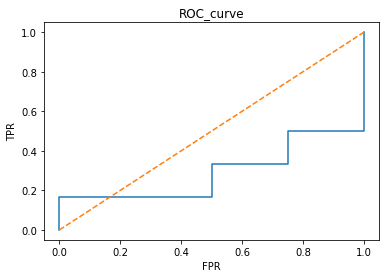

In [10]:
# 畫圖
plt.plot(ROC_points_x,ROC_points_y)

x=np.linspace(0,1)
y=x
plt.plot(x,y,'--')

new_ticks = np.linspace(0,1,6)
plt.xticks(new_ticks)
plt.yticks(new_ticks)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_curve')
plt.show()

### 直接使用 sklearn.metrics.roc_curve

In [11]:
from sklearn import metrics

In [12]:
label=data.label
value=data.value
fpr, tpr, thresholds = metrics.roc_curve(label, value, pos_label=1)

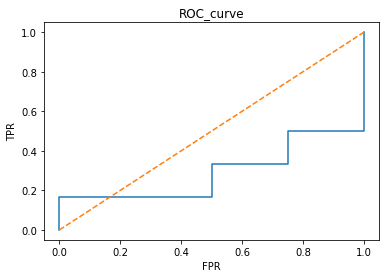

In [13]:
# 畫圖
plt.plot(fpr,tpr)

x=np.linspace(0,1)
y=x
plt.plot(x,y,'--')

new_ticks = np.linspace(0,1,6)
plt.xticks(new_ticks)
plt.yticks(new_ticks)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_curve')
plt.show()